<h1><center> A new way of classifiying NBA Players </center></h1>

<img src='TheRinger_Top25NBAPlayers_2.jpg'>

## Introduction

If you know me well, you are probably aware that my basketball fandom has been one of my life’s defining attributes. You may also know how I like to keep track of my favorite players’ season-average stats, often crunching numbers in my head after every shot when watching games. But this is the first time I am using an elaborate arsenal of Data Science tools to look at NBA data. Needless to say, I’m very excited about where we can go with this. 

About 7 months ago, I stubled upon an [article](https://www.thescore.com/nba/news/1974726) on TheScore which explain that why the tranditional 5 positions are no longer enough to decribe current NBA players. Ever since the rise of Golden State Warriors dynasty lead by Stephen Curry, many NBA teams have trying and dying to replicate the success of the Golden State in recent years. Drafting and Trading guards with promissing shooting skills, turing the NBA into a 'Small Ball' era. As a result, players who is in the traditional foward position have to change their play-style, shooting more threes and picking up more assits to mantain there relevence in this new NBA era. The game has has shifted toward a state of positional hybridism. Therefore, the traditional 5 main positions (Point Guard, Shooting Guard, Small Foward, Power Foward, Center) are no longer sufficient to describe the NBA players in this era. The authors from the articles came up with a way to classigy players in 9 classes, based on the way they pay the game.

In this tutorial, I will take another shot at classifying players in various clusters, depending on what they do on the court. However, I will do it using data science and more precisely the K-Means clustering.

I will also take a deeper look at what makes a winning team, i.e. what type of players should be put together for a team to win an NBA title.

Let's get into it!

## Data Scrapping and Preparation

I began by scraping data directly from [NBA.com](https://www.nba.com/). I will be scrapping the [players traditional statistics](https://www.nba.com/stats/players/traditional/?sort=MIN&dir=-1&Season=2019-20&SeasonType=Regular%20Season), and [players shooting statistics](https://www.nba.com/stats/players/shooting/?Season=2019-20&SeasonType=Regular%20Season&DistanceRange=By%20Zone) from the NBA.com. I collected stats for all 529 players that played in the league in 2019-2020 season.

Along with traditional stats (points per game, assists, rebounds, etc.), I also collected stats describing shot location, type of offensive play (drive, iso, etc.) defensive efficiency and usage rate.

Lets try to scrape the players traditional statistics first.

Before scraping the data we have to import some libraries to help us scrape data.
The function of each libraries is as follow:<br>

<b>Numpy</b>: help us in operation of data <br>
<b>Pandas</b>: help us store and present data in a tabulated format <br>
<b>BeautifulSoup</b>: help us scrape data from our website <br>

Since, the NBA.com is an dynamic website, we would need an additional library to navigate the website and succefully scrape the data from the website. The library is as follow:<br>

<b>webdriver</b> from [selenium](https://selenium-python.readthedocs.io/index.html): help us navigate and browse dynamic website <br>
<b>Note</b>: Since I want to use Chrome as my webdriver, I would need to download the chromedriver executable as well from https://chromedriver.chromium.org/. 

We will first load up the Chrome webdriver and run the appropriate executable. After we have our webdriver running, we can ask the webdriver to get the website by giving it the url of our website. Since by default, the website only display stats for 50 players. Therefore, we have to select the option that would ask the website to display all players. We will have to go through the html page of the website and select the appropriate. This [article](http://kevincsong.com/Scraping-stats.nba.com-with-python/) have explained this step well.

After we have everything displayed on our website, we can use the BeautifulSoup library to scrape the players stats from the website. We first parsed the website into a html page and find the table that stores the players stats. We get the table and store them into a DataFrame using pandas.

In [46]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver

# HTTP GET request sent to the URL url
url = "https://www.nba.com/stats/players/traditional/?sort=MIN&dir=-1&Season=2019-20&SeasonType=Regular%20Season"
# launch webdriver
d = webdriver.Chrome(executable_path='C:/Users/lucas/fall2020/final/chromedriver.exe')
# HTTP GET request sent to the URL url
d.get(url)
# click the option in the html page to select all players
d.find_element_by_xpath('/html/body/main/div/div/div[2]/div/div/nba-stat-table/div[3]/div/div/select/option[1]').click()

# Use BeautifulSoup to parse the GET response
root = BeautifulSoup(d.page_source, 'html.parser')
# print(root.prettify())
# find the table within the html page
html_table = root.find("div", class_="nba-stat-table").find("table")
# read the html table into pandas's DataFrame
table = pd.read_html(str(html_table))
df = table[0]
df.columns

Index(['Unnamed: 0', 'PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3',
       '+/-', 'GP RANK', 'W RANK', 'L RANK', 'MIN RANK', 'PTS RANK',
       'FGM RANK', 'FGA RANK', 'FG% RANK', '3PM RANK', '3PA RANK', '3P% RANK',
       'FTM RANK', 'FTA RANK', 'FT% RANK', 'OREB RANK', 'DREB RANK',
       'REB RANK', 'AST RANK', 'TOV RANK', 'STL RANK', 'BLK RANK', 'PF RANK',
       'FP RANK', 'DD2 RANK', 'TD3 RANK', '+/- RANK'],
      dtype='object')

After getting the stats table, we can see that there is a number of unnecessary data. We have to select data that is reflected only on the website. The following code fragment select the appropriate columns that is presented on the website.

In [47]:
# Select necessary columns
df = df[['PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3',
       '+/-']]
# options to display all data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

PLAYER TEAM  AGE  GP   W   L   MIN   PTS   FGM   FGA  \
0              Damian Lillard  POR   29  66  33  33  37.5  30.0   9.5  20.4   
1                 CJ McCollum  POR   28  70  34  36  36.5  22.2   8.7  19.4   
2                James Harden  HOU   30  68  43  25  36.5  34.3   9.9  22.3   
3                  Kyle Lowry  TOR   34  58  41  17  36.2  19.4   5.8  13.8   
4                Bradley Beal  WAS   27  57  20  37  36.0  30.5  10.4  22.9   
5           Russell Westbrook  HOU   31  57  36  21  36.0  27.2  10.6  22.5   
6                Devin Booker  PHX   23  70  34  36  35.9  26.6   9.0  18.3   
7               Fred VanVleet  TOR   26  54  40  14  35.7  17.6   5.9  14.3   
8                 Ben Simmons  PHI   23  57  35  22  35.4  16.4   6.6  11.4   
9                  Trae Young  ATL   21  60  18  42  35.3  29.6   9.1  20.8   
10              Pascal Siakam  TOR   26  60  46  14  35.2  22.9   8.3  18.4   
11            Devonte' Graham  CHA   25  63  23  40  35.1  18.2   5.8  15.3   
12           Domantas Sabonis  IND   24  62  37  25  34.8  18.5   7.4  13.7   
13                Zach LaVine  CHI   25  60  20  40  34.8  25.5   9.0  20.0   
14               Jrue Holiday  NOP   30  61  26  35  34.7  19.1   7.5  16.5   
15    Shai Gilgeous-Alexander  OKC   21  70  43  27  34.7  19.0   6.8  14.5   
16               LeBron James  LAL   35  67  50  17  34.6  25.3   9.6  19.4   
17            Kelly Oubre Jr.  PHX   24  56  22  34  34.5  18.7   6.7  14.8   
18            Harrison Barnes  SAC   28  72  31  41  34.5  14.5   5.1  11.0   
19             Andrew Wiggins  GSW   25  54  15  39  34.4  21.8   8.1  18.1   
20              Anthony Davis  LAL   27  62  46  16  34.4  26.1   8.9  17.7   
21               Terry Rozier  CHA   26  63  21  42  34.4  18.0   6.3  14.9   
22               Jayson Tatum  BOS   22  66  46  20  34.3  23.4   8.4  18.6   
23                Rudy Gobert  UTA   28  68  42  26  34.3  15.1   5.7   8.2   
24              Tobias Harris  PHI   27  72  43  29  34.3  19.6   7.7  16.3   
25                P.J. Tucker  HOU   35  72  44  28  34.3   6.9   2.5   5.9   
26           Donovan Mitchell  UTA   23  69  43  26  34.3  24.0   8.7  19.4   
27              DeMar DeRozan  SAS   30  68  31  37  34.1  22.1   8.2  15.4   
28             Brandon Ingram  NOP   22  62  25  37  33.9  23.8   8.2  17.7   
29               Jaylen Brown  BOS   23  57  38  19  33.9  20.3   7.5  15.6   
30         Karl-Anthony Towns  MIN   24  35  10  25  33.9  26.5   9.0  17.8   
31               Jimmy Butler  MIA   30  58  38  20  33.8  19.9   5.9  13.1   
32                Bam Adebayo  MIA   22  72  44  28  33.6  15.9   6.1  11.0   
33                Luka Doncic  DAL   21  61  36  25  33.6  28.8   9.5  20.6   
34             Gordon Hayward  BOS   30  52  34  18  33.5  17.5   6.7  13.5   
35               John Collins  ATL   22  41  15  26  33.2  21.6   8.6  14.8   
36          LaMarcus Aldridge  SAS   34  53  23  30  33.1  18.9   7.4  15.0   
37           Bojan Bogdanovic  UTA   31  63  41  22  33.1  20.2   6.6  14.8   
38                Will Barton  DEN   29  58  38  20  33.0  15.1   5.7  12.7   
39              Collin Sexton  CLE   21  65  19  46  33.0  20.8   7.9  16.7   
40             Andre Drummond  CLE   26  57  21  36  33.0  17.7   7.3  13.8   
41               Luke Kennard  DET   24  28  11  17  32.9  15.8   5.4  12.2   
42               Kyrie Irving  BKN   28  20   8  12  32.9  27.4  10.0  20.8   
43                T.J. Warren  IND   26  67  42  25  32.9  19.8   8.0  14.9   
44               Clint Capela  ATL   26  39  22  17  32.8  13.9   6.3   9.9   
45            Carmelo Anthony  POR   36  58  28  30  32.8  15.4   5.8  13.5   
46              Deandre Ayton  PHX   21  38  20  18  32.5  18.2   8.2  14.9   
47               Aaron Gordon  ORL   24  62  30  32  32.5  14.4   5.4  12.4   
48              Julius Randle  NYK   25  64  21  43  32.5  19.5   7.2  15.7   
49              Kawhi Leonard  LAC   29  57  41  16  32.4  27.1   9.3  19

Next, we do the same for the second website.

In [83]:
# Second Table
url = "https://www.nba.com/stats/players/shooting/?Season=2019-20&SeasonType=Regular%20Season&DistanceRange=By%20Zone"
# launch webdriver
d = webdriver.Chrome(executable_path='C:/Users/lucas/fall2020/final/chromedriver.exe')
# HTTP GET request sent to the URL url
d.get(url)
# click the option in the html page to select all players
d.find_element_by_xpath('/html/body/main/div/div/div[2]/div/div/nba-stat-table/div[3]/div/div/select/option[1]').click()

# Use BeautifulSoup to parse the GET response
root = BeautifulSoup(d.page_source, 'html.parser')
# print(root.prettify())
html_table = root.find("div", class_="nba-stat-table").find("table")
table = pd.read_html(str(html_table))
df1 = table[0]
df1

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
            Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
            Unnamed: 0_level_2 Unnamed: 1_level_2 Unnamed: 2_level_2   
                        Player               TEAM                AGE   
                        Player               TEAM                AGE   
                        Player               TEAM                AGE   
0                 Aaron Gordon                ORL                 24   
1                Aaron Holiday                IND                 23   
2                  Abdel Nader                OKC                 26   
3                  Adam Mokoka                CHI                 21   
4            Admiral Schofield                WAS                 23   
5                   Al Horford                PHI                 34   
6              Al-Farouq Aminu                ORL                 29   
7                   Alec Burks                PHI                 28   
8               Alen Smailagic                GSW                 19   
9                  Alex Caruso                LAL                 26   
10                    Alex Len                SAC                 27   
11            Alfonzo McKinnie                CLE                 27   
12               Alize Johnson                IND                 24   
13                Allen Crabbe                MIN                 28   
14               Allonzo Trier                NYK                 24   
15             Amile Jefferson                ORL                 27   
16                 Amir Coffey                LAC                 23   
17              Andre Drummond                CLE                 26   
18              Andre Iguodala                MIA                 36   
19              Andre Roberson                OKC                 28   
20              Andrew Wiggins                GSW                 25   
21             Anfernee Simons                POR                 21   
22                  Ante Zizic                CLE                 23   
23               Anthony Davis                LAL                 27   
24            Anthony Tolliver                MEM                 35   
25          Antonius Cleveland                DAL                 26   
26            Anzejs Pasecniks                WAS                 24   
27                 Aron Baynes                PHX                 33   
28               Austin Rivers                HOU                 27   
29               Avery Bradley                LAL                 29   
30                  BJ Johnson                ORL                 24   
31                 Bam Adebayo                MIA                 22   
32                Ben McLemore                HOU                 27   
33                 Ben Simmons                PHI                 23   
34             Bismack Biyombo                CHA                 27   
35               Blake Griffin                DET                 31   
36            Boban Marjanovic                DAL                 31   
37                Bobby Portis                NYK                 25   
38           Bogdan Bogdanovic                SAC                 27   
39            Bojan Bogdanovic                UTA                 31   
40                     Bol Bol                DEN                 20   
41              Brad Wanamaker                BOS                 30   
42                Bradley Beal                WAS                 27   
43              Brandon Clarke                MEM                 23   
44             Brandon Goodwin                ATL                 24   
45              Brandon Ingram                NOP                 22   
46              Brandon Knight                DET                 28   
47              Brian Bowen II                IND                 21   
48                 Brook Lopez                MIL                 32   
49                 Bruce Brown                DET   

There is a bunch of NaN value which need to be removed from the table. And the columns label is pretty chaotic because of the multilevel indexing in the original table. We need to fix this by droping all NaN values and the multilevel index and renaming the columns with readable label.

In [84]:
# remove all nan from table
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)
# remove all multilevel index
df1.columns = df1.columns.droplevel([0,1,2,3,4])

Here we rename the columns and remove unecessary data from the table which is not present in the original webpage.

In [86]:
df1.columns = ['PLAYER', 'TEAM', 'AGE', 'RA-FGM', 'RA-FGA', 'RA-FG%', 'P-FGM', \
               'P-FGA', 'P-FG%', 'MD-FGM', 'MD-FGA', 'MD-FG%', 'L3-FGM', 'L3-FGA', \
               'L3-FG%', 'R3-FGM', 'R3-FGA', 'R3-FG%', '??-FGM', '??-FGA', '??-FG%', \
               'AB3-FGM', 'AB3-FGA', 'AB3-FG%']
df1 = df1[['PLAYER', 'TEAM', 'AGE', 'RA-FGM', 'RA-FGA', 'RA-FG%', 'P-FGM', \
               'P-FGA', 'P-FG%', 'MD-FGM', 'MD-FGA', 'MD-FG%', 'L3-FGM', 'L3-FGA', \
               'L3-FG%', 'R3-FGM', 'R3-FGA', 'R3-FG%', \
               'AB3-FGM', 'AB3-FGA', 'AB3-FG%']]
df1

PLAYER TEAM  AGE RA-FGM RA-FGA RA-FG% P-FGM P-FGA  \
0                Aaron Gordon  ORL   24    3.0    4.4   67.6   0.7   1.9   
1               Aaron Holiday  IND   23    1.2    2.2   54.2   0.6   1.6   
2                 Abdel Nader  OKC   26    1.0    1.5   67.9   0.3   0.7   
3                 Adam Mokoka  CHI   21    0.5    1.1   50.0   0.0   0.0   
4           Admiral Schofield  WAS   23    0.3    0.6   50.0   0.1   0.2   
5                  Al Horford  PHI   34    1.6    2.4   69.6   0.6   1.7   
6             Al-Farouq Aminu  ORL   29    0.6    1.6   35.7   0.2   0.9   
7                  Alec Burks  PHI   28    1.5    2.8   53.2   0.7   2.1   
8              Alen Smailagic  GSW   19    1.0    1.1   87.5   0.1   0.5   
9                 Alex Caruso  LAL   26    1.1    1.7   64.2   0.0   0.5   
10                   Alex Len  SAC   27    2.3    3.4   68.3   0.6   1.2   
11           Alfonzo McKinnie  CLE   27    1.1    1.7   65.7   0.3   0.6   
12              Alize Johnson  IND   24    0.5    0.9   53.3   0.1   0.3   
13               Allen Crabbe  MIN   28    0.3    0.4   75.0   0.2   0.6   
14              Allonzo Trier  NYK   24    0.6    1.0   62.5   0.1   0.3   
15            Amile Jefferson  ORL   27    0.2    0.6   28.6   0.2   0.4   
16                Amir Coffey  LAC   23    0.7    1.2   55.6   0.3   0.6   
17             Andre Drummond  CLE   26    5.9    9.3   63.7   1.2   3.5   
18             Andre Iguodala  MIA   36    0.9    1.2   72.0   0.0   0.2   
19             Andre Roberson  OKC   28    0.7    1.7   41.7   0.0   0.4   
20             Andrew Wiggins  GSW   25    3.7    5.5   67.4   1.5   3.9   
21            Anfernee Simons  POR   21    1.0    1.8   55.6   0.3   1.1   
22                 Ante Zizic  CLE   23    1.3    2.1   60.9   0.4   0.9   
23              Anthony Davis  LAL   27    5.0    6.8   73.5   1.3   3.3   
24           Anthony Tolliver  MEM   35    0.2    0.4   39.1   0.1   0.1   
25         Antonius Cleveland  DAL   26    0.3    0.8   37.5   0.1   0.2   
26           Anzejs Pasecniks  WAS   24    1.7    2.3   72.9   0.7   1.6   
27                Aron Baynes  PHX   33    2.1    3.3   63.5   0.8   1.4   
28              Austin Rivers  HOU   27    1.3    2.3   57.2   0.3   0.9   
29              Avery Bradley  LAL   29    1.0    1.6   61.8   0.3   0.7   
30                 BJ Johnson  ORL   24    0.4    1.1   40.0   0.0   0.1   
31                Bam Adebayo  MIA   22    4.3    6.0   70.7   1.5   3.4   
32               Ben McLemore  HOU   27    0.8    1.2   70.7   0.0   0.1   
33                Ben Simmons  PHI   23    5.5    8.1   68.0   1.0   2.9   
34            Bismack Biyombo  CHA   27    2.4    3.5   68.4   0.4   1.5   
35              Blake Griffin  DET   31    2.8    5.1   54.9   0.4   1.8   
36           Boban Marjanovic  DAL   31    2.0    2.6   77.6   0.6   1.5   
37               Bobby Portis  NYK   25    1.4    2.3   60.0   0.9   1.8   
38          Bogdan Bogdanovic  SAC   27    1.2    1.9   61.2   0.9   1.8   
39           Bojan Bogdanovic  UTA   31    2.2    3.7   60.8   1.1   2.8   
40                    Bol Bol  DEN   20    1.2    1.5   77.8   0.5   0.8   
41             Brad Wanamaker  BOS   30    1.2    1.9   63.2   0.3   1.0   
42               Bradley Beal  WAS   27    4.1    6.4   65.0   1.3   3.3   
43             Brandon Clarke  MEM   23    3.2    4.3   74.2   1.3   2.3   
44            Brandon Goodwin  ATL   24    0.8    1.4   57.4   0.5   1.1   
45             Brandon Ingram  NOP   22    3.1    5.0   62.5   1.0   2.6   
46             Brandon Knight  DET   28    0.2    0.5   33.3   0.3   0.7   
47             Brian Bowen II  IND   21    0.3    0.8   40.0   0.2   0.2   
48                Brook Lopez  MIL   32    1.7    2.5   66.9   0.8   2.0   
49                Bruce Brown  DET   23    2.0    3.7   54.4   0.8   2.1   
50              Bruno Caboclo  HOU   24    0.8    1.3   62.5   0.2   0.4   
51             Bruno Fernando  ATL   21    1.5    2.2   68.5   0.2   0.

### Preparing the data

After getting all table, we have to combine them all into a single table using the merge operation.
Both table should be a one to one relationship (meaning that for each row in table 1 there is a corresponding row in table 2 and 3).
We merge the two table on the players name, team and age.
Then, I decided to get rid of players that played less than 12 minutes per game, as I felt classifying players based on how they play when they barely play was no gonnna provide accurate results. That leaves us with a total of 395 players. The resulting table will be output as follow.

In [91]:
# merge the two table
players_stats = pd.merge(df, df1, how = 'inner', on = ['PLAYER','TEAM','AGE'])
# remove players with average minutes played less that 12 minutes
players_stats = players_stats[players_stats.MIN > 12]
# reset index of table
players_stats = players_stats.reset_index(drop=True)
players_stats

PLAYER TEAM  AGE  GP   W   L   MIN   PTS   FGM   FGA  \
0              Damian Lillard  POR   29  66  33  33  37.5  30.0   9.5  20.4   
1                 CJ McCollum  POR   28  70  34  36  36.5  22.2   8.7  19.4   
2                James Harden  HOU   30  68  43  25  36.5  34.3   9.9  22.3   
3                  Kyle Lowry  TOR   34  58  41  17  36.2  19.4   5.8  13.8   
4                Bradley Beal  WAS   27  57  20  37  36.0  30.5  10.4  22.9   
5           Russell Westbrook  HOU   31  57  36  21  36.0  27.2  10.6  22.5   
6                Devin Booker  PHX   23  70  34  36  35.9  26.6   9.0  18.3   
7               Fred VanVleet  TOR   26  54  40  14  35.7  17.6   5.9  14.3   
8                 Ben Simmons  PHI   23  57  35  22  35.4  16.4   6.6  11.4   
9                  Trae Young  ATL   21  60  18  42  35.3  29.6   9.1  20.8   
10              Pascal Siakam  TOR   26  60  46  14  35.2  22.9   8.3  18.4   
11            Devonte' Graham  CHA   25  63  23  40  35.1  18.2   5.8  15.3   
12           Domantas Sabonis  IND   24  62  37  25  34.8  18.5   7.4  13.7   
13                Zach LaVine  CHI   25  60  20  40  34.8  25.5   9.0  20.0   
14               Jrue Holiday  NOP   30  61  26  35  34.7  19.1   7.5  16.5   
15    Shai Gilgeous-Alexander  OKC   21  70  43  27  34.7  19.0   6.8  14.5   
16               LeBron James  LAL   35  67  50  17  34.6  25.3   9.6  19.4   
17            Kelly Oubre Jr.  PHX   24  56  22  34  34.5  18.7   6.7  14.8   
18            Harrison Barnes  SAC   28  72  31  41  34.5  14.5   5.1  11.0   
19             Andrew Wiggins  GSW   25  54  15  39  34.4  21.8   8.1  18.1   
20              Anthony Davis  LAL   27  62  46  16  34.4  26.1   8.9  17.7   
21               Terry Rozier  CHA   26  63  21  42  34.4  18.0   6.3  14.9   
22               Jayson Tatum  BOS   22  66  46  20  34.3  23.4   8.4  18.6   
23                Rudy Gobert  UTA   28  68  42  26  34.3  15.1   5.7   8.2   
24              Tobias Harris  PHI   27  72  43  29  34.3  19.6   7.7  16.3   
25                P.J. Tucker  HOU   35  72  44  28  34.3   6.9   2.5   5.9   
26           Donovan Mitchell  UTA   23  69  43  26  34.3  24.0   8.7  19.4   
27              DeMar DeRozan  SAS   30  68  31  37  34.1  22.1   8.2  15.4   
28             Brandon Ingram  NOP   22  62  25  37  33.9  23.8   8.2  17.7   
29               Jaylen Brown  BOS   23  57  38  19  33.9  20.3   7.5  15.6   
30         Karl-Anthony Towns  MIN   24  35  10  25  33.9  26.5   9.0  17.8   
31               Jimmy Butler  MIA   30  58  38  20  33.8  19.9   5.9  13.1   
32                Bam Adebayo  MIA   22  72  44  28  33.6  15.9   6.1  11.0   
33                Luka Doncic  DAL   21  61  36  25  33.6  28.8   9.5  20.6   
34             Gordon Hayward  BOS   30  52  34  18  33.5  17.5   6.7  13.5   
35               John Collins  ATL   22  41  15  26  33.2  21.6   8.6  14.8   
36          LaMarcus Aldridge  SAS   34  53  23  30  33.1  18.9   7.4  15.0   
37           Bojan Bogdanovic  UTA   31  63  41  22  33.1  20.2   6.6  14.8   
38                Will Barton  DEN   29  58  38  20  33.0  15.1   5.7  12.7   
39              Collin Sexton  CLE   21  65  19  46  33.0  20.8   7.9  16.7   
40             Andre Drummond  CLE   26  57  21  36  33.0  17.7   7.3  13.8   
41               Luke Kennard  DET   24  28  11  17  32.9  15.8   5.4  12.2   
42               Kyrie Irving  BKN   28  20   8  12  32.9  27.4  10.0  20.8   
43                T.J. Warren  IND   26  67  42  25  32.9  19.8   8.0  14.9   
44               Clint Capela  ATL   26  39  22  17  32.8  13.9   6.3   9.9   
45            Carmelo Anthony  POR   36  58  28  30  32.8  15.4   5.8  13.5   
46              Deandre Ayton  PHX   21  38  20  18  32.5  18.2   8.2  14.9   
47               Aaron Gordon  ORL   24  62  30  32  32.5  14.4   5.4  12.4   
48              Julius Randle  NYK   25  64  21  43  32.5  19.5   7.2  15.7   
49              Kawhi Leonard  LAC   29  57  41  16  32.4  27.1   9.3  19

### Feature creation

I decide to create 3 new variable, describing what percentage of a player's field goal attempts come from where on the court (paint, mid range or 3 point line).

I will first add up the field goal attempt (FGA) of the Restricted Area and Paint as Paint_FGA because they are the closest shots to the rim. Then we add up the field goal attempt of all the shots attempted behind the 3-point line as 3P_FGA.

Next, we can calculate the percentage of field goal attempts from different area of the court as follow:

<b>Close Range Percentage</b> = Paint_FGA / Total_FGA<br>
<b>Mid-Range Percentage</b> = MD_FGA / Total_FGA<br>
<b>Perimeter Percentage</b> = 3P_FGA / Total_FGA<br>

In [99]:
# Get total FG attempts
Total_FGA = players_stats.filter(regex='FGA').sum(axis=1)
# Casting data type into operatable type
players_stats= players_stats.astype({'RA-FGA': 'float64', 'P-FGA': 'float64', 'L3-FGA': 'float64','R3-FGA': 'float64','AB3-FGA': 'float64'})

#Get new variable
players_stats['Paint_FGA'] = players_stats['RA-FGA'] + players_stats['P-FGA']
players_stats['3P_FGA'] = players_stats['L3-FGA'] + players_stats['R3-FGA'] + players_stats['AB3-FGA']
players_stats['Close'] = players_stats['Paint_FGA'] / Total_FGA
players_stats['Mid-Range'] = players_stats['MD-FGA'] / Total_FGA
players_stats['Perimeter'] = players_stats['3P_FGA'] / Total_FGA

players_stats

PLAYER TEAM  AGE  GP   W   L   MIN   PTS   FGM   FGA  \
0              Damian Lillard  POR   29  66  33  33  37.5  30.0   9.5  20.4   
1                 CJ McCollum  POR   28  70  34  36  36.5  22.2   8.7  19.4   
2                James Harden  HOU   30  68  43  25  36.5  34.3   9.9  22.3   
3                  Kyle Lowry  TOR   34  58  41  17  36.2  19.4   5.8  13.8   
4                Bradley Beal  WAS   27  57  20  37  36.0  30.5  10.4  22.9   
5           Russell Westbrook  HOU   31  57  36  21  36.0  27.2  10.6  22.5   
6                Devin Booker  PHX   23  70  34  36  35.9  26.6   9.0  18.3   
7               Fred VanVleet  TOR   26  54  40  14  35.7  17.6   5.9  14.3   
8                 Ben Simmons  PHI   23  57  35  22  35.4  16.4   6.6  11.4   
9                  Trae Young  ATL   21  60  18  42  35.3  29.6   9.1  20.8   
10              Pascal Siakam  TOR   26  60  46  14  35.2  22.9   8.3  18.4   
11            Devonte' Graham  CHA   25  63  23  40  35.1  18.2   5.8  15.3   
12           Domantas Sabonis  IND   24  62  37  25  34.8  18.5   7.4  13.7   
13                Zach LaVine  CHI   25  60  20  40  34.8  25.5   9.0  20.0   
14               Jrue Holiday  NOP   30  61  26  35  34.7  19.1   7.5  16.5   
15    Shai Gilgeous-Alexander  OKC   21  70  43  27  34.7  19.0   6.8  14.5   
16               LeBron James  LAL   35  67  50  17  34.6  25.3   9.6  19.4   
17            Kelly Oubre Jr.  PHX   24  56  22  34  34.5  18.7   6.7  14.8   
18            Harrison Barnes  SAC   28  72  31  41  34.5  14.5   5.1  11.0   
19             Andrew Wiggins  GSW   25  54  15  39  34.4  21.8   8.1  18.1   
20              Anthony Davis  LAL   27  62  46  16  34.4  26.1   8.9  17.7   
21               Terry Rozier  CHA   26  63  21  42  34.4  18.0   6.3  14.9   
22               Jayson Tatum  BOS   22  66  46  20  34.3  23.4   8.4  18.6   
23                Rudy Gobert  UTA   28  68  42  26  34.3  15.1   5.7   8.2   
24              Tobias Harris  PHI   27  72  43  29  34.3  19.6   7.7  16.3   
25                P.J. Tucker  HOU   35  72  44  28  34.3   6.9   2.5   5.9   
26           Donovan Mitchell  UTA   23  69  43  26  34.3  24.0   8.7  19.4   
27              DeMar DeRozan  SAS   30  68  31  37  34.1  22.1   8.2  15.4   
28             Brandon Ingram  NOP   22  62  25  37  33.9  23.8   8.2  17.7   
29               Jaylen Brown  BOS   23  57  38  19  33.9  20.3   7.5  15.6   
30         Karl-Anthony Towns  MIN   24  35  10  25  33.9  26.5   9.0  17.8   
31               Jimmy Butler  MIA   30  58  38  20  33.8  19.9   5.9  13.1   
32                Bam Adebayo  MIA   22  72  44  28  33.6  15.9   6.1  11.0   
33                Luka Doncic  DAL   21  61  36  25  33.6  28.8   9.5  20.6   
34             Gordon Hayward  BOS   30  52  34  18  33.5  17.5   6.7  13.5   
35               John Collins  ATL   22  41  15  26  33.2  21.6   8.6  14.8   
36          LaMarcus Aldridge  SAS   34  53  23  30  33.1  18.9   7.4  15.0   
37           Bojan Bogdanovic  UTA   31  63  41  22  33.1  20.2   6.6  14.8   
38                Will Barton  DEN   29  58  38  20  33.0  15.1   5.7  12.7   
39              Collin Sexton  CLE   21  65  19  46  33.0  20.8   7.9  16.7   
40             Andre Drummond  CLE   26  57  21  36  33.0  17.7   7.3  13.8   
41               Luke Kennard  DET   24  28  11  17  32.9  15.8   5.4  12.2   
42               Kyrie Irving  BKN   28  20   8  12  32.9  27.4  10.0  20.8   
43                T.J. Warren  IND   26  67  42  25  32.9  19.8   8.0  14.9   
44               Clint Capela  ATL   26  39  22  17  32.8  13.9   6.3   9.9   
45            Carmelo Anthony  POR   36  58  28  30  32.8  15.4   5.8  13.5   
46              Deandre Ayton  PHX   21  38  20  18  32.5  18.2   8.2  14.9   
47               Aaron Gordon  ORL   24  62  30  32  32.5  14.4   5.4  12.4   
48              Julius Randle  NYK   25  64  21  43  32.5  19.5   7.2  15.7   
49              Kawhi Leonard  LAC   29  57  41  16  32.4  27.1   9.3  19

## Data exploration 


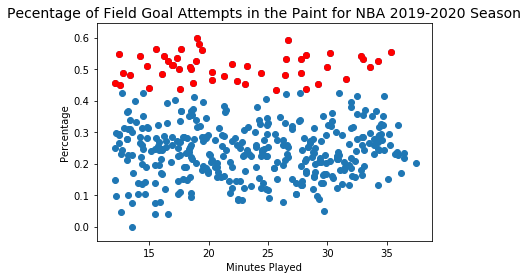

In [115]:
import matplotlib.pyplot as plt

paintscorer = players_stats.sort_values(by='Close', ascending=False)
paintscorer = paintscorer.head(50)
paintscorer = paintscorer.reset_index()

plt.scatter(players_stats.MIN, players_stats.Close)
plt.xlabel('Minutes Played', size = 10)
plt.ylabel('Percentage', size = 10)
plt.title('Pecentage of Field Goal Attempts in the Paint for NBA 2019-2020 Season', size = 14)
plt.scatter(paintscorer.MIN, paintscorer.Close, color = 'Red')